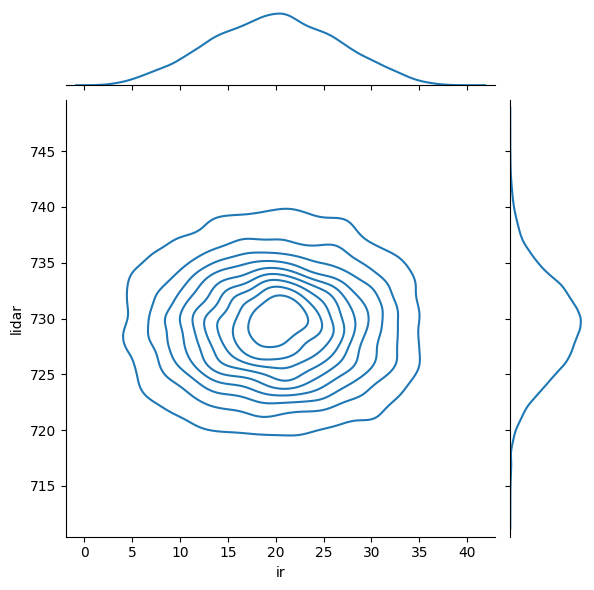

In [26]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

data = pl.read_csv(
    "./sensor_data_700.txt",
    separator=" ",
    has_header=False,
    new_columns=["date", "time", "ir", "lidar"],
)

d = data.filter(120000 <= pl.col("time"), pl.col("time") < 160000)
d = d[["ir", "lidar"]]

sns.jointplot(d, x="ir", y="lidar", kind="kde")
plt.show()

In [39]:
print("ir variance:", d["ir"].var())
print("LiDAR variance:", d["lidar"].var())

diff_ir = d["ir"] - d["ir"].mean()
diff_lidar = d["lidar"] - d["lidar"].mean()

a = diff_ir * diff_lidar
print("共分散:", a.sum() / (a.len() - 1))

print(d.mean())

d.to_pandas().cov()

ir variance: 42.11712636770162
LiDAR variance: 17.702026469211273
共分散: -0.3167780338543712
shape: (1, 2)
┌───────────┬────────────┐
│ ir        ┆ lidar      │
│ ---       ┆ ---        │
│ f64       ┆ f64        │
╞═══════════╪════════════╡
│ 19.860247 ┆ 729.311958 │
└───────────┴────────────┘


,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


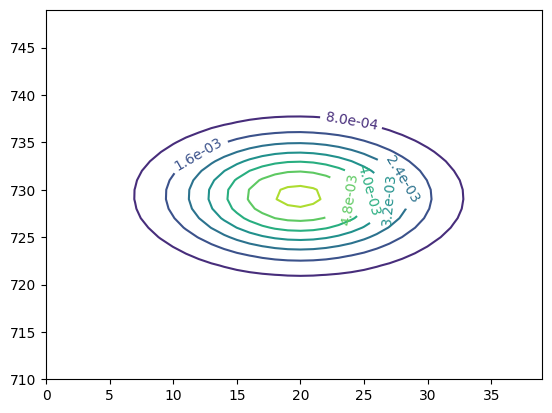

In [56]:
from scipy.stats import multivariate_normal

ir_lidar = multivariate_normal(d.mean().transpose().to_arrow()[0], cov=d.to_pandas().cov())

import numpy as np

x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape+ (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, ir_lidar.pdf(pos))
cont.clabel(fmt="%1.1e")

plt.show()

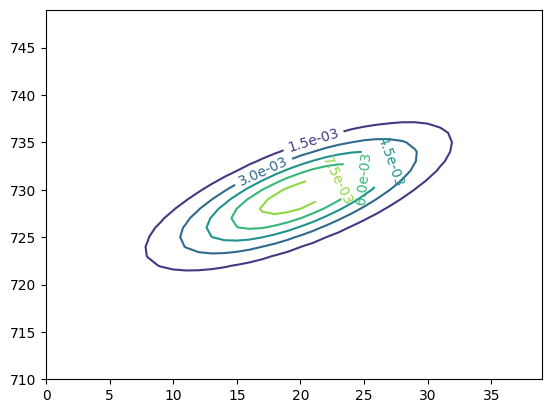

In [59]:
c = d.to_pandas().cov().values + np.array([[0, 20], [20, 0]])
tmp = multivariate_normal(mean=d.mean().transpose().to_arrow()[0], cov=c)
cont = plt.contour(x, y, tmp.pdf(pos))
cont.clabel(fmt="%1.1e")
plt.show()